# 010: SVM

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import LinearSVM
from visualizations import plot_roc, plot_losses
from implementations import sigmoid
from model_selection import test_val_split, find_best_threshold

%load_ext autoreload
%autoreload 2

In [3]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

Iteration 0, Training Loss: 0.7499999999999999
Iteration 1, Training Loss: 0.7079622285259297
Iteration 2, Training Loss: 0.6687269751501311
Iteration 3, Training Loss: 0.6321355333244728
Iteration 4, Training Loss: 0.598376115959248
Iteration 5, Training Loss: 0.5681041328029314
Iteration 6, Training Loss: 0.5420431119541181
Iteration 7, Training Loss: 0.5217294042758756
Iteration 8, Training Loss: 0.5055001838128339
Iteration 9, Training Loss: 0.4914488967184559
Iteration 10, Training Loss: 0.47890103680450485
Iteration 11, Training Loss: 0.4675386500745028
Iteration 12, Training Loss: 0.4571742472269419
Iteration 13, Training Loss: 0.4476852694846269
Iteration 14, Training Loss: 0.4390298139166083
Iteration 15, Training Loss: 0.43107958151694614
Iteration 16, Training Loss: 0.4238145491879042
Iteration 17, Training Loss: 0.41713178747191126
Iteration 18, Training Loss: 0.4110145712783744
Iteration 19, Training Loss: 0.40535822360576657
Iteration 20, Training Loss: 0.4001642120152885

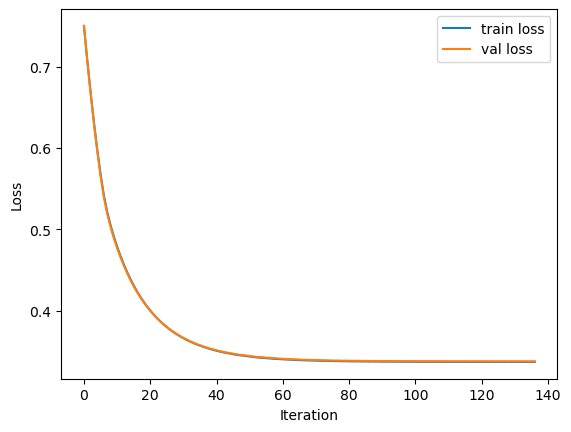

In [11]:
svm = LinearSVM(C=0.75, lr=0.05, max_iters=1000)
num_samples = 100000
train_losses, val_losses = svm.train(x_train[:num_samples], y_train[:num_samples], verbose=True)
plot_losses(train_losses, val_losses)

In [32]:
# predict
y_pred = svm.predict(x_train[num_samples:2*num_samples], scores=True)
print("AUC-ROC:", auc_roc(y_pred, y_train[num_samples:2*num_samples]))

AUC-ROC: 0.8280989213961933


(array([25998., 32129., 17259.,  9311.,  6161.,  4138.,  2844.,  1503.,
          574.,    83.]),
 array([0.21860745, 0.28599938, 0.3533913 , 0.42078322, 0.48817514,
        0.55556707, 0.62295899, 0.69035091, 0.75774284, 0.82513476,
        0.89252668]),
 <BarContainer object of 10 artists>)

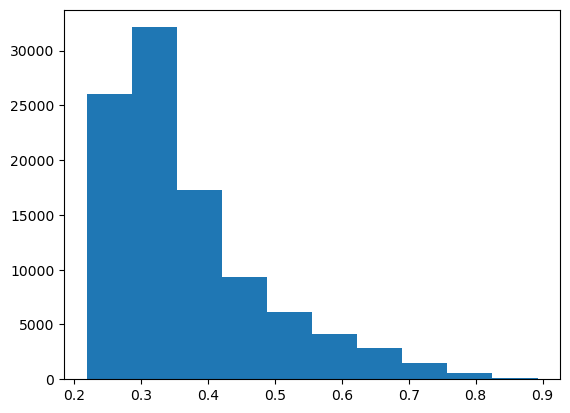

In [33]:
plt.hist(y_pred)

Threshold: 0.00, F1 Score: 0.1600
Threshold: 0.01, F1 Score: 0.1600
Threshold: 0.02, F1 Score: 0.1600
Threshold: 0.03, F1 Score: 0.1600
Threshold: 0.04, F1 Score: 0.1600
Threshold: 0.05, F1 Score: 0.1600
Threshold: 0.06, F1 Score: 0.1600
Threshold: 0.07, F1 Score: 0.1600
Threshold: 0.08, F1 Score: 0.1600
Threshold: 0.09, F1 Score: 0.1600
Threshold: 0.10, F1 Score: 0.1600
Threshold: 0.11, F1 Score: 0.1600
Threshold: 0.12, F1 Score: 0.1600
Threshold: 0.13, F1 Score: 0.1600
Threshold: 0.14, F1 Score: 0.1600
Threshold: 0.15, F1 Score: 0.1600
Threshold: 0.16, F1 Score: 0.1600
Threshold: 0.17, F1 Score: 0.1600
Threshold: 0.18, F1 Score: 0.1600
Threshold: 0.19, F1 Score: 0.1600
Threshold: 0.20, F1 Score: 0.1600
Threshold: 0.21, F1 Score: 0.1600
Threshold: 0.22, F1 Score: 0.1600
Threshold: 0.23, F1 Score: 0.1600
Threshold: 0.24, F1 Score: 0.1601
Threshold: 0.25, F1 Score: 0.1607
Threshold: 0.26, F1 Score: 0.1652
Threshold: 0.27, F1 Score: 0.1782
Threshold: 0.28, F1 Score: 0.1965
Threshold: 0.2

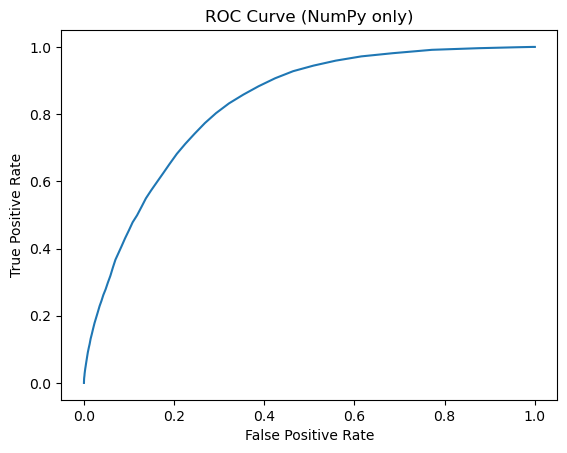

In [29]:
plot_roc(y_pred, y_train[num_samples:2*num_samples], )

In [30]:
y_pred = svm.predict(x_train[num_samples:2*num_samples])
print("F1 Score:", f_score(y_pred, y_train[num_samples:2*num_samples]))

F1 Score: 0.3661413856853596
